## 개요
파이썬(주피터노트북) 환경에서 Shape(SHP) 파일 등의 공간데이터 파일을 로딩하고, 지도 형태로 시각화 해보겠습니다.

---

## 사용할 패키지 준비
shp 파일을 손쉬게 다룰 수 있는 가장 대표적인 패키지(라이브러리)인 geopandas를 불러옵니다 

In [3]:
# import 패키지명 (as 별칭)
# 별칭은 패키지명이 길 때 효율적으로 패키지명을 불러 쓰기 위한 용도 등입니다. 
import geopandas as gpd

In [2]:
# import pandas as pd
# pd.options.display.float_format = '{:,.1f}'.format  #화면 출력시 숫자 표시
# pd.set_option('float_format', '{:f}'.format)  # 숫자가 지수 형태로 표시되지 않도록 

https://datascienceschool.net/01%20python/02.13%20%ED%8C%8C%EC%9D%B4%EC%8D%AC%20%ED%8C%A8%ED%82%A4%EC%A7%80%20%EC%82%AC%EC%9A%A9%ED%95%98%EA%B8%B0.html

---

## 사용할 데이터 준비
국내 공간 공공데이터 대표 사이트 중 한 곳인 "국가공간정보포털"의 "행정경계(시도)" shp을 이용해 보겠습니다.   
http://data.nsdi.go.kr/dataset/12942

In [4]:
shp_path = '../data/border.shp'
gdf = gpd.read_file(shp_path)

geopandas의 read_file을 이용하면 쉽게 shp 파일을 이용할 수 있습니다. read_file에서는 geopackage(.gpkg)와 geojson도 지원합니다.   

아래의 .info()는 데이터의 행, 열 등의 기본적인 정보를 볼 수 있는 기능이고   
.head()는 맨 위 다섯줄을 눈으로 확인해볼 수 있는 기능입니다.  

In [5]:
gdf.info()
gdf.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   gid        251 non-null    int64   
 1   placename  251 non-null    object  
 2   geometry   251 non-null    geometry
dtypes: geometry(1), int64(1), object(1)
memory usage: 6.0+ KB


,gid,placename,geometry
0,1,Baker Island,"LINESTRING (-176.46143 0.21528, -176.46832 0.2..."
1,2,Howland Island,"LINESTRING (-176.63617 0.79028, -176.64447 0.7..."
2,3,Johnston Atoll,"LINESTRING (-169.53894 16.72416, -169.54388 16..."
3,4,Paracel Islands,"MULTILINESTRING ((112.27138 16.97444, 112.2683..."
4,5,Svalbard,"MULTILINESTRING ((27.14500 80.00444, 27.10111 ..."


geopandas는 이름에서부터 pandas 패키지를 기반으로 하고 있는 것을 알 수 있고, pandas의 함수(기능)와 매우 유사합니다.   
따라서, 공간 분석/시각화 위주로 작업을 한다고 해도 pandas의 기능을 필요로 할 경우가 많기 때문에   
pandas의 주요 기능을 알아두면 좋습니다.   
https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf  

head로 일부 속성 정보를 조회해봤을 때 NAME 항목의 한글이 깨져 보입니다.   
Geopandas.read_file reference에서 인코딩(encoding) 부분에서 답을 찾을 수 있습니다.  
https://geopandas.org/en/stable/docs/reference/api/geopandas.read_file.html 

## 지도 시각화

<Axes: >

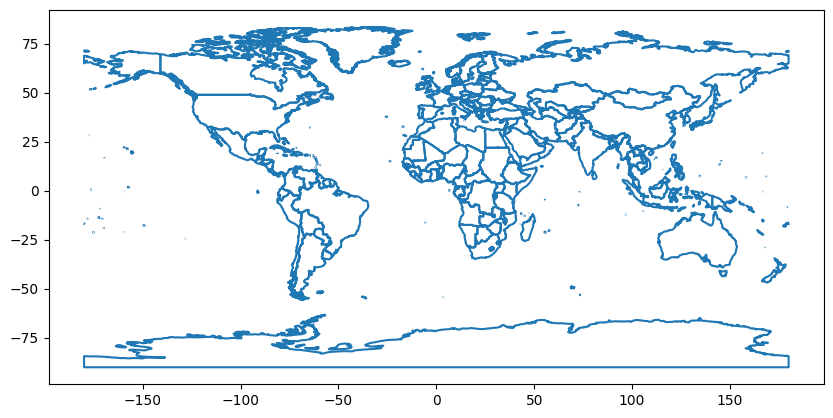

In [7]:
gdf.plot(figsize=(10,10))

혹시 에러가 발생하는지요?   
맨 아래의 ImportError의 설명을 참조했을 때 어떻게 하면 좋을지요? (힌트 : 패키지 설치) 

In [6]:
!pip install matplotlib

                                              0.0/7.6 MB ? eta -:--:--
     ---                                      0.8/7.6 MB 24.1 MB/s eta 0:00:01
     -----------                              2.2/7.6 MB 28.1 MB/s eta 0:00:01
     ---------------------                    4.2/7.6 MB 33.3 MB/s eta 0:00:01
     --------------------------------         6.1/7.6 MB 35.9 MB/s eta 0:00:01
     ---------------------------------------  7.6/7.6 MB 37.5 MB/s eta 0:00:01
     ---------------------------------------- 7.6/7.6 MB 34.9 MB/s eta 0:00:00
                                              0.0/470.9 kB ? eta -:--:--
     ---------------------------------------- 470.9/470.9 kB ? eta 0:00:00
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
                                              0.0/1.9 MB ? eta -:--:--
     ---------------------------------------  1.9/1.9 MB 62.1 MB/s eta 0:00:01
     ---------------------------------------- 1.9/1.9 MB 41.1 MB/s eta 0:00:00
                       

X와 Y 좌표축의 숫자는 무슨 의미(단위)일까요?   
시도 행정경계 데이터의 좌표계는 어떻게 알 수 있을까요?

In [8]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

data/shp/bordeer.shp 파일에 .prj 파일이 포함되어 있는지요?   
.prj 파일은 좌표계 정보를 담고 있는 파일로서 .prj가 포함되어 있으면 geopandas의 .crs 를 이용하여 좌표계 정보를 알 수 있습니다.   
EPSG:4326은 GPS 측량을 통해 획득할 수 있는 전 지구를 커버하는 WGS84 타원체의 경도, 위도 좌표계입니다.   
https://epsg.io/4326

만약 .prj 파일이 없다면 어떤 차이가 있을까요?   
궁금하면 .prj 파일의 파일명을 변경하거나, 확장자명을 변경한 다음에 이 노트의 맨 위부터 다시 코드를 실행해 보면 됩니다.    

---

### 수고 많으셨습니다!!! 